In [142]:
%matplotlib inline

In [143]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

In [144]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [145]:
mpg_df = pd.read_csv("C:/Users/Vigoursoft/car-mpg.data.csv")

In [146]:
mpg_df.head()

,mpg,cyl,disp,hp,weight,acceleration,model_year,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [147]:
mpg_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0
car_type,398.0,0.000000,0.000000,0.0,0.000,0.0,0.000,0.0


In [115]:
temp = pd.DataFrame(mpg_df.hp.str.isdigit())
temp[temp['hp'] == False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [148]:
mpg_df = mpg_df.replace('?', np.nan)

In [149]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
mpg             398 non-null float64
cyl             398 non-null int64
disp            398 non-null float64
hp              392 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
car_type        398 non-null int64
car_name        398 non-null object
dtypes: float64(3), int64(5), object(2)
memory usage: 31.2+ KB


In [150]:
mpg_df['hp'] = mpg_df['hp'].astype('float64')

In [151]:
numeric_cols = mpg_df.drop('car_name', axis=1)

car_names = pd.DataFrame(mpg_df[['car_name']])

numeric_cols = numeric_cols.apply(lambda x: x.fillna(x.median()), axis=0)
mpg_df = numeric_cols.join(car_names)\

mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
mpg             398 non-null float64
cyl             398 non-null int64
disp            398 non-null float64
hp              398 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
car_type        398 non-null int64
car_name        398 non-null object
dtypes: float64(4), int64(5), object(1)
memory usage: 31.2+ KB


C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


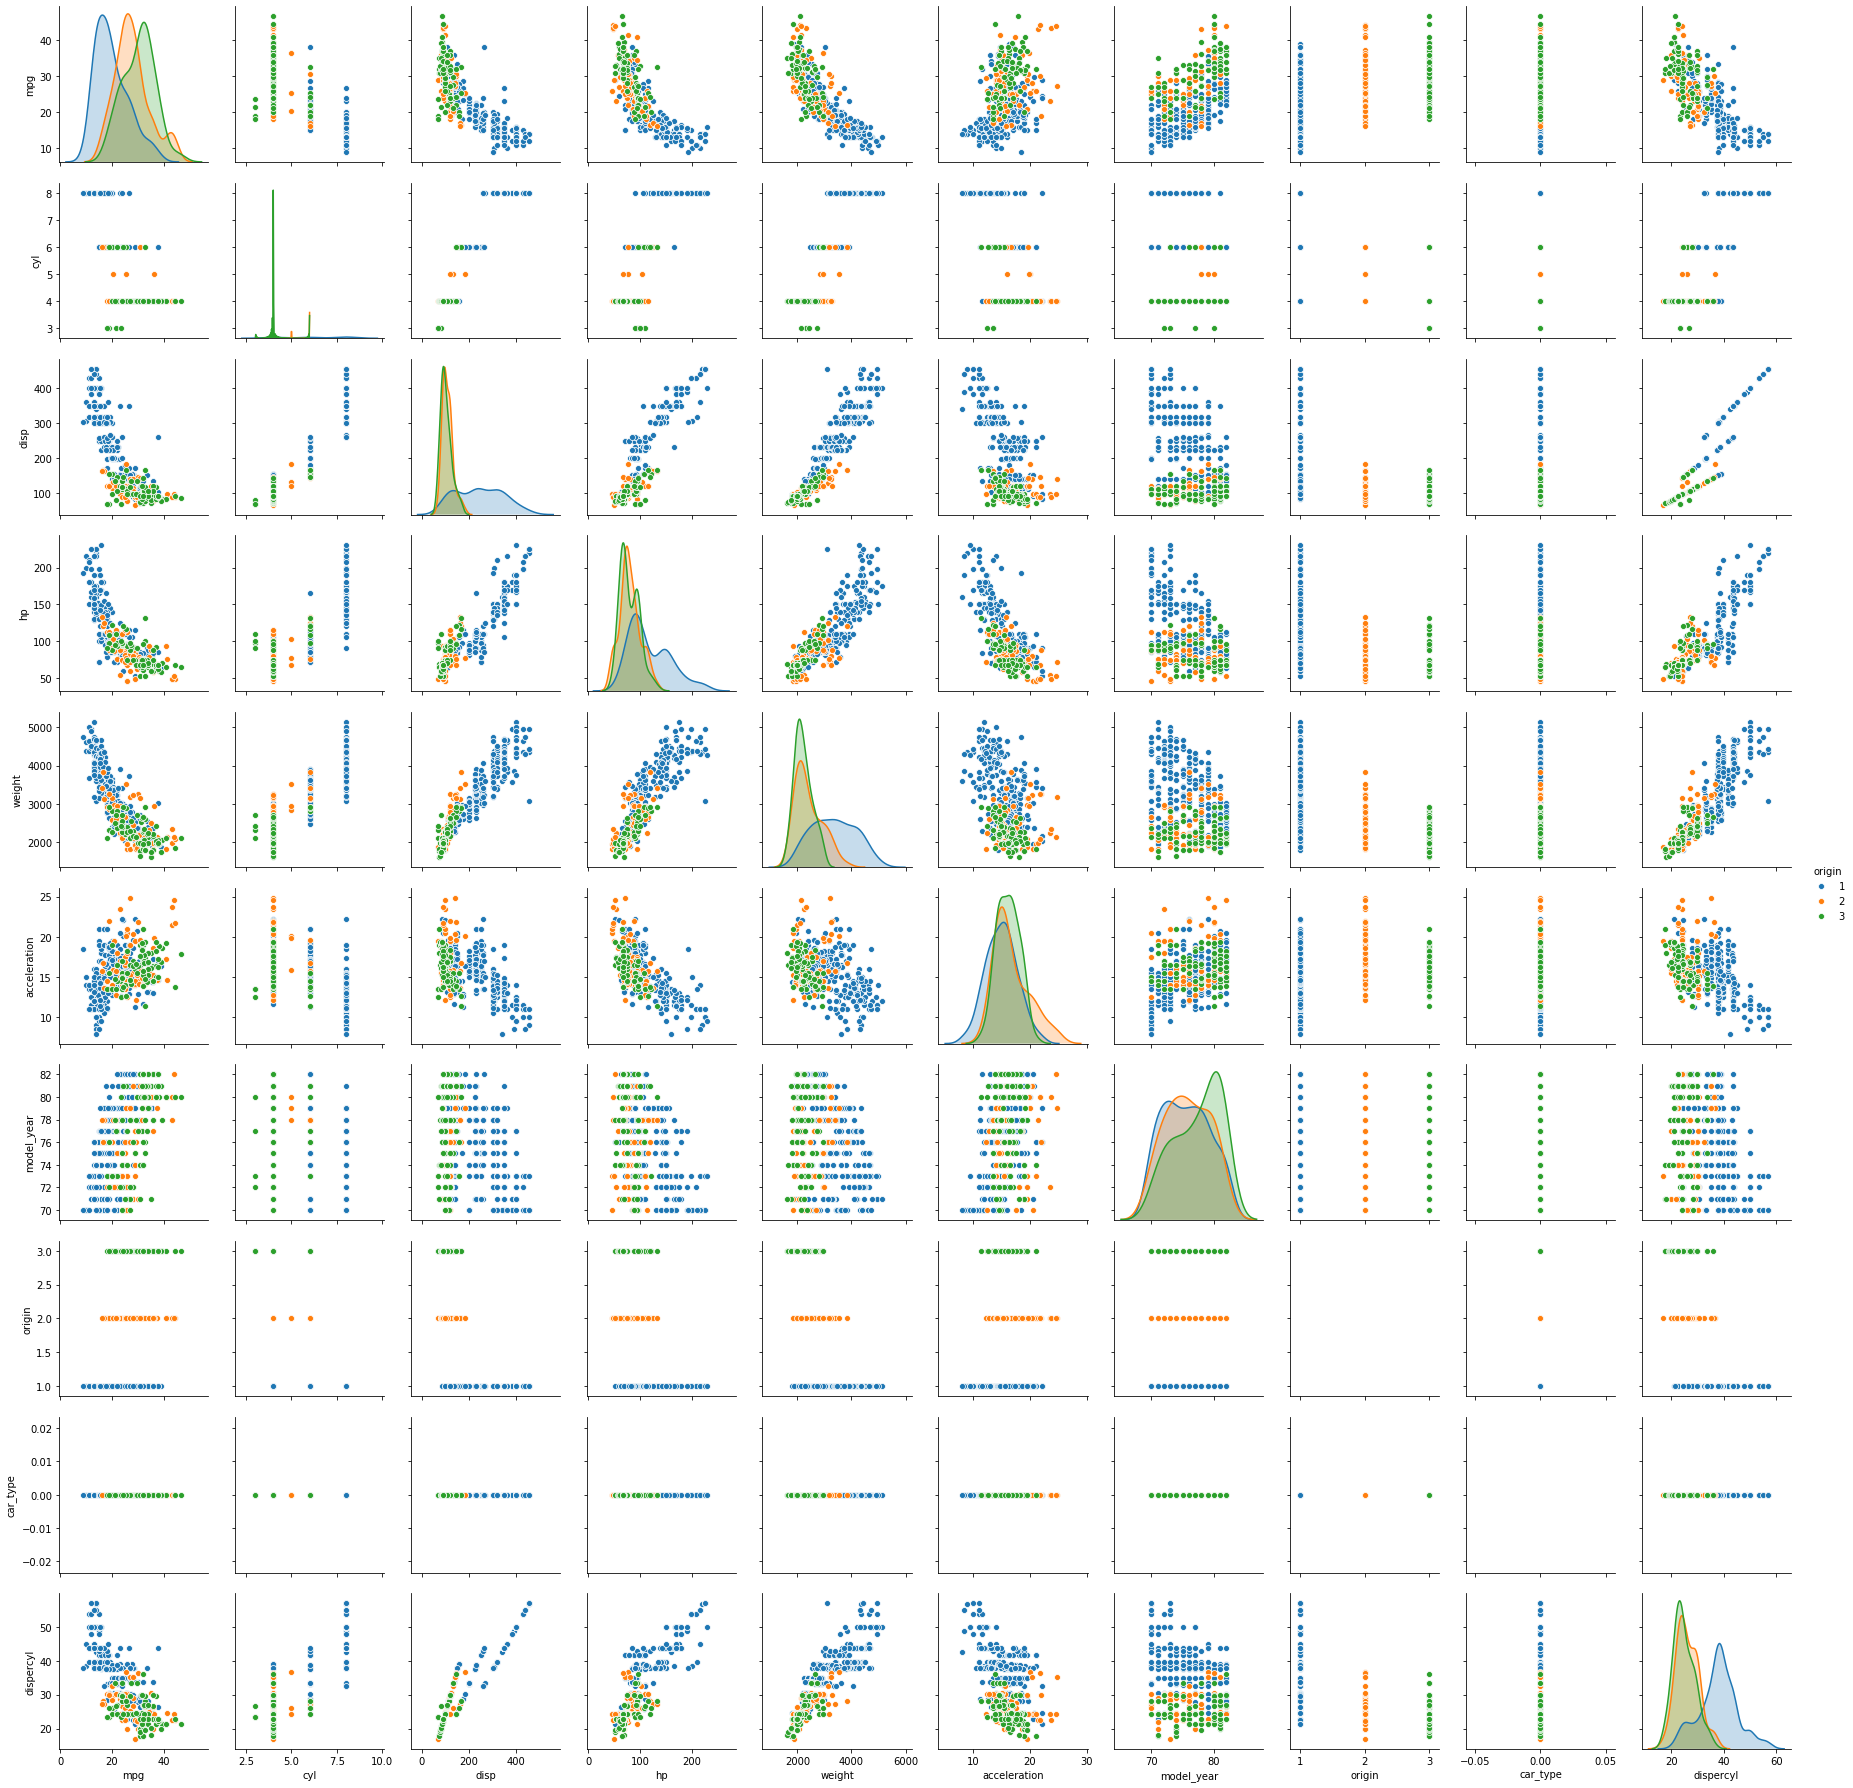

In [120]:
mpg_df_attr = mpg_df.iloc[:, 0:9]
mpg_df_attr['dispercyl'] = mpg_df_attr['disp'] / mpg_df_attr['cyl']
sns.pairplot(mpg_df_attr, diag_kind='kde', hue = 'origin')

In [152]:
from scipy.stats import zscore

mpg_df_attr = mpg_df.loc[:, 'mpg':'origin']
mpg_df_attr_z = mpg_df_attr.apply(zscore)

mpg_df_attr_z.pop('origin')
mpg_df_attr_z.pop('yr')

array = mpg_df_attr_z.values

KeyError: 'yr'

In [153]:
cluster_range = range( 2, 6)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters, n_init = 5)
    clusters.fit(mpg_df_attr)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df [ : 15]

,num_clusters,cluster_errors
0,2,7.428960e+07
1,3,3.420817e+07
2,4,1.905688e+07
3,5,1.376977e+07


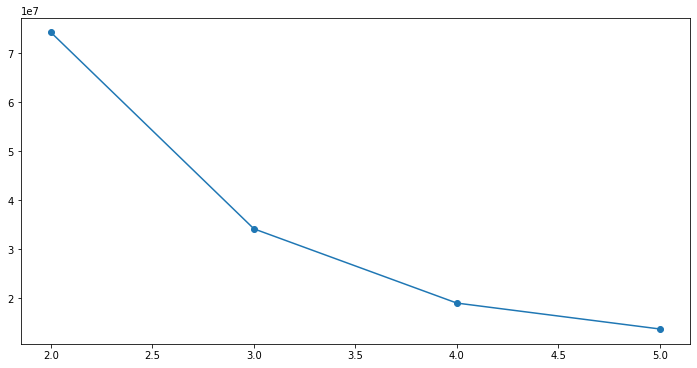

In [154]:
plt.figure(figsize=(12, 6) )
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o")

In [155]:
cluster = KMeans( n_clusters = 4, random_state = 2354 )
cluster.fit(mpg_df_attr_z)
mpg_df_attr_z_copy = mpg_df_attr_z.copy(deep = True)

In [156]:
centroids = cluster.cluster_centers_
centroids

array([[-0.49682681,  0.42443037,  0.30530323, -0.03775766,  0.33776539,
         0.29367006,  0.03298635],
       [ 1.19411648, -0.82450284, -0.78042723, -0.74238037, -0.76525521,
         0.38447752,  1.12432606],
       [-1.16379715,  1.49819126,  1.50392292,  1.52168282,  1.40409797,
        -1.0861486 , -0.68832385],
       [ 0.21628669, -0.86209143, -0.80905811, -0.56076487, -0.76253463,
         0.32055871, -0.61862263]])

In [157]:
centroid_df = pd.DataFrame(centroids, columns = list(mpg_df_attr_z) )
centroid_df

,mpg,cyl,disp,hp,weight,acceleration,model_year
0,-0.496827,0.424430,0.305303,-0.037758,0.337765,0.293670,0.032986
1,1.194116,-0.824503,-0.780427,-0.742380,-0.765255,0.384478,1.124326
2,-1.163797,1.498191,1.503923,1.521683,1.404098,-1.086149,-0.688324
3,0.216287,-0.862091,-0.809058,-0.560765,-0.762535,0.320559,-0.618623


In [158]:
prediction=cluster.predict(mpg_df_attr_z)
mpg_df_attr_z["GROUP"] = prediction

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CB52170F88>,
      dtype=object)

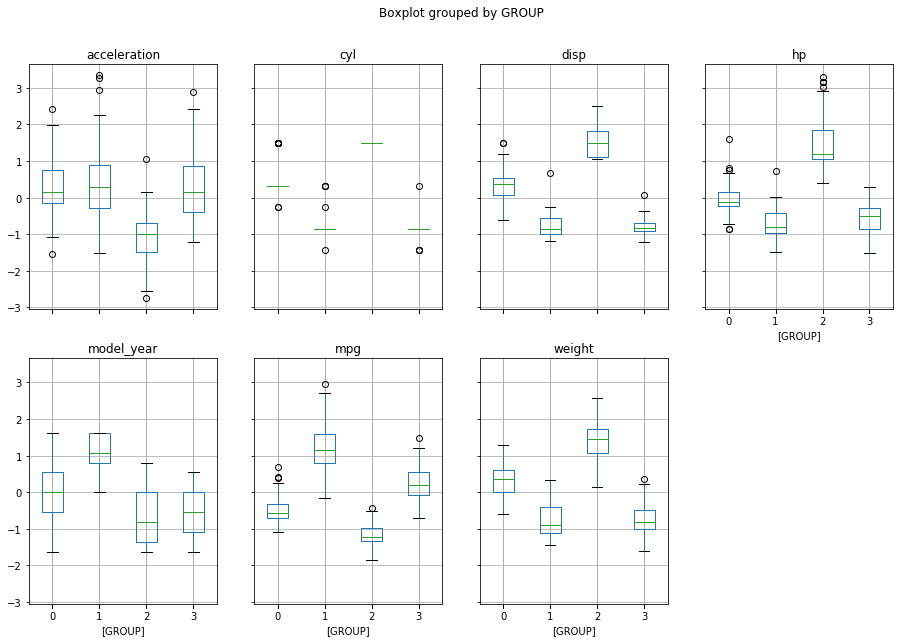

In [159]:
import matplotlib.pylab as plt

mpg_df_attr_z.boxplot(by = 'GROUP', layout=(2,4), figsize=(15, 10))

# Identifying and handling outliers

In [160]:
data = mpg_df_attr_z

def replace(group):
    median, std = group.median(), group.std()
    outliers = (group - median).abs() > 2*std
    group[outliers] = group.median()
    return group

data_corrected = (data.groupby('GROUP').transform(replace))
concat_data = data_corrected.join(pd.DataFrame(mpg_df_attr_z['GROUP']))


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [162]:
from sklearn import svm
clr = svm.SVR(C = 15, degree=1, kernel='linear')
clr.fit(X_train, y_train)

NameError: name 'X_train' is not defined